In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
print(sys.version)

3.5.2 |Anaconda 2.4.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [3]:
pd.__version__

'0.21.0'

In [4]:
data = pd.read_csv('final_general_data.csv')
print(len(data))

853624


In [5]:
data[:5]

,participant,ground_truth,recog_resp,recog_conf,recog_rt,participant_session,hmm
0,LTP268,old,old,5,1395.0,LTP2681,tp
1,LTP268,old,new,2,1788.0,LTP2681,fn
2,LTP268,old,new,3,2308.0,LTP2681,fn
3,LTP268,old,old,5,1320.0,LTP2681,tp
4,LTP268,old,old,5,1025.0,LTP2681,tp


In [6]:
# Defining the bins based on quantiles (~same amount of entities in each bin)
new_response_times = data.loc[data['recog_resp'] == 'new']['recog_rt'].values
old_response_times = data.loc[data['recog_resp'] == 'old']['recog_rt'].values
new_bins = np.percentile(new_response_times,[20, 40, 60, 80, 100])
old_bins = np.percentile(old_response_times,[20, 40, 60, 80, 100])
print(new_bins)
print(old_bins)

[  706.   809.   935.  1178.  3000.]
[  573.   654.   745.   917.  3000.]


In [7]:
# Creating bins
conditions = [(((data['recog_resp'] == 'new') & (data["recog_rt"] <= new_bins[0])) | ((data['recog_resp'] == 'old') & (data["recog_rt"] <= old_bins[0]))),
              (((data['recog_resp'] == 'new') & (data["recog_rt"] <= new_bins[1])) | ((data['recog_resp'] == 'old') & (data["recog_rt"] <= old_bins[1]))),
              (((data['recog_resp'] == 'new') & (data["recog_rt"] <= new_bins[2])) | ((data['recog_resp'] == 'old') & (data["recog_rt"] <= old_bins[2]))),
              (((data['recog_resp'] == 'new') & (data["recog_rt"] <= new_bins[3])) | ((data['recog_resp'] == 'old') & (data["recog_rt"] <= old_bins[3])))]

choices = [5, 4, 3, 2]

data['bins'] = np.select(conditions, choices, default=1)

y = data['bins'].values
l = [np.count_nonzero(y == x) for x in range(1,6)]
print('Elements in each bin:',l)
print('STD on elements in bins:',np.std(l))
print('Sum of elements in bins:',sum(l))
print('Size of data:',len(data))

Elements in each bin: [170480, 170490, 169976, 170530, 172148]
STD on elements in bins: 740.162792904
Sum of elements in bins: 853624
Size of data: 853624


In [8]:
distribution = data.loc[:, ['bins', 'hmm', 'participant_session']].groupby(['hmm', 'bins']).count()
distribution

participant_session
hmm bins                     
fn  1                   13652
    2                   11043
    3                    9176
    4                    7775
    5                    8181
fp  1                   17251
    2                    7549
    3                    4930
    4                    4756
    5                    9830
tn  1                   42843
    2                   45429
    3                   47221
    4                   48860
    5                   48866
tp  1                   96734
    2                  106469
    3                  108649
    4                  109139
    5                  105271

In [9]:
# Creating the "RAW" section of "Table 1"
raw_new_lure = distribution.loc['tn']
raw_old_lure = distribution.loc['fp']
sum_raw_new_lure = sum(raw_new_lure.values)[0]
sum_raw_old_lure = sum(raw_old_lure.values)[0]
sum_raw_lure = sum_raw_new_lure + sum_raw_old_lure

raw_new_target = distribution.loc['fn']
raw_old_target = distribution.loc['tp']
sum_raw_new_target = sum(raw_new_target.values)[0]
sum_raw_old_target = sum(raw_old_target.values)[0]
sum_raw_target = sum_raw_new_target + sum_raw_old_target

print("Sum of lures (new):",sum_raw_lure)
print("Sum of targets (old):",sum_raw_target)

Sum of lures (new): 277535
Sum of targets (old): 576089


In [10]:
# Creaating the "ALL" section of "Table 1"
all_new_lure = raw_new_lure/sum_raw_lure
all_old_lure = raw_old_lure/sum_raw_lure
sum_all_new_lure = sum(all_new_lure.values)[0]
sum_all_old_lure = sum(all_old_lure.values)[0]
sum_all_lure = sum_all_new_lure + sum_all_old_lure

all_new_target = raw_new_target/sum_raw_target
all_old_target = raw_old_target/sum_raw_target
sum_all_new_target = sum(all_new_target.values)[0]
sum_all_old_target = sum(all_old_target.values)[0]
sum_all_target = sum_all_new_target + sum_all_old_target

print("Sum of lures (new):",sum_all_lure)
print("Sum of targets (old):",sum_all_target)

Sum of lures (new): 1.0
Sum of targets (old): 1.0


In [11]:
# Creaating the "REC" section of "Table 1"
rec_new_lure = raw_new_lure/sum_raw_new_lure
rec_old_lure = raw_old_lure/sum_raw_old_lure
sum_rec_new_lure = sum(rec_new_lure.values)[0]
sum_rec_old_lure = sum(rec_old_lure.values)[0]
sum_rec_lure = sum_rec_new_lure + sum_rec_old_lure

rec_new_target = raw_new_target/sum_raw_new_target
rec_old_target = raw_old_target/sum_raw_old_target
sum_rec_new_target = sum(rec_new_target.values)[0]
sum_rec_old_target = sum(rec_old_target.values)[0]
sum_rec_target = sum_rec_new_target + sum_rec_old_target

print("Sum of lures (new):",sum_rec_lure)
print("Sum of targets (old):",sum_rec_target)

Sum of lures (new): 2.0
Sum of targets (old): 2.0


In [12]:
# Creating "Table 2"
raw_fa = pd.concat([raw_old_lure.iloc[::-1], raw_new_lure ]).cumsum()
raw_hit = pd.concat([raw_old_target.iloc[::-1], raw_new_target ]).cumsum()
all_fa = [0] + list(np.transpose(raw_fa/sum_raw_lure).values[0])
all_hit = [0] + list(np.transpose(raw_hit/sum_raw_target).values[0])

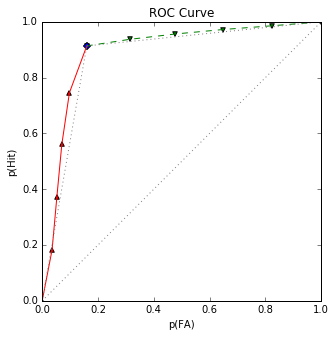

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.title('ROC Curve')
plt.xlabel('p(FA)')
plt.ylabel('p(Hit)')
plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
plt.scatter(all_fa[:5], all_hit[:5], 20, c='r', marker='^')
plt.scatter(all_fa[5:], all_hit[5:], 20, c='g', marker='v')
plt.plot(all_fa[:6], all_hit[:6], c='r')
plt.plot(all_fa[5:], all_hit[5:], c='g', linestyle='--')
plt.plot([0, 1], [0, 1], c='gray', linestyle=':')
plt.plot([0, all_fa[5]], [0, all_hit[5]], c='gray', linestyle=':')
plt.plot([all_fa[5], 1], [all_hit[5], 1], c='gray', linestyle=':')
plt.scatter(all_fa[5], all_hit[5], 25, c='b', marker='D')

In [14]:
# Calculating ROC per participant in order to get d' per participant
from scipy.stats import norm
from scipy.integrate import trapz
from math import sqrt
from collections import defaultdict

distribution_grouped = data.loc[:, ['bins', 'hmm', 'participant_session', 'participant']].groupby(['participant_session', 'hmm', 'bins']).count()
session_list = list(distribution_grouped.index.levels[0])

participant_session_auc = defaultdict(list)
for session in session_list:
    raw_new_lure = distribution_grouped.loc[session, 'tn'].reindex([1, 2, 3, 4, 5], fill_value=0, copy=False)
    raw_old_lure = distribution_grouped.loc[session, 'fp'].reindex([1, 2, 3, 4, 5], fill_value=0, copy=False)
    sum_raw_new_lure = sum(raw_new_lure.values)[0]
    sum_raw_old_lure = sum(raw_old_lure.values)[0]
    sum_raw_lure = sum_raw_new_lure + sum_raw_old_lure

    raw_new_target = distribution_grouped.loc[session, 'fn'].reindex([1, 2, 3, 4, 5], fill_value=0, copy=False)
    raw_old_target = distribution_grouped.loc[session, 'tp'].reindex([1, 2, 3, 4, 5], fill_value=0, copy=False)
    sum_raw_new_target = sum(raw_new_target.values)[0]
    sum_raw_old_target = sum(raw_old_target.values)[0]
    sum_raw_target = sum_raw_new_target + sum_raw_old_target
    
    raw_fa = pd.concat([raw_old_lure.iloc[::-1], raw_new_lure ]).cumsum()
    raw_hit = pd.concat([raw_old_target.iloc[::-1], raw_new_target ]).cumsum()
    all_fa = [0] + list(np.transpose(raw_fa/sum_raw_lure).values[0])
    all_hit = [0] + list(np.transpose(raw_hit/sum_raw_target).values[0])
    
    auc = trapz(all_hit, all_fa)
    participant_session_auc[session[:6]].append(auc)


participant_auc = { k: np.mean(participant_session_auc[k]) for k in participant_session_auc }
participant_criterion = { k: sqrt(2) * norm.ppf(participant_auc[k]) for k in participant_auc }

In [15]:
import pickle
pickle.dump(participant_auc, open( "auc_response_time.bin", "wb" ))

In [16]:
participant_auc

{'LTP063': 0.95479236158373537,
 'LTP064': 0.86794726146054302,
 'LTP065': 0.92830311777572161,
 'LTP066': 0.8607037703629834,
 'LTP067': 0.86436220198519575,
 'LTP069': 0.93449590647288727,
 'LTP070': 0.86339450339361645,
 'LTP073': 0.95002405171356996,
 'LTP074': 0.9215906772621375,
 'LTP075': 0.82336326252911995,
 'LTP076': 0.95662888373420041,
 'LTP077': 0.82108248403662143,
 'LTP079': 0.97355762428051562,
 'LTP081': 0.92264616440551317,
 'LTP082': 0.97440266561741595,
 'LTP084': 0.65633428485060374,
 'LTP085': 0.8999579830852289,
 'LTP086': 0.77005601375849142,
 'LTP087': 0.74781817154711505,
 'LTP088': 0.78074838774566968,
 'LTP089': 0.75245869172275859,
 'LTP090': 0.96124500510158872,
 'LTP091': 0.68471799737120553,
 'LTP092': 0.96711148808480185,
 'LTP093': 0.926193045027494,
 'LTP094': 0.91593676528600609,
 'LTP095': 0.79739609780330289,
 'LTP096': 0.80016851387601073,
 'LTP098': 0.89575978368803888,
 'LTP099': 0.73975399398264574,
 'LTP100': 0.87861955849560991,
 'LTP101': 0.

In [17]:
print(len(participant_auc))

171


(array([  6.,  22.,  28.,  50.,  41.,  24.]),
 array([ 0.43370525,  0.83635728,  1.2390093 ,  1.64166133,  2.04431336,
         2.44696538,  2.84961741]),
 <a list of 6 Patch objects>)

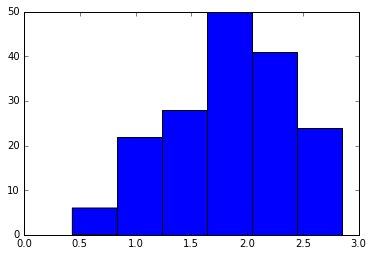

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list(participant_criterion.values()), 6)